# Computer Vision - P3
# First part


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 26th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

First part: Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

Second part: Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background subtraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)


Note: One of the applications of the backgroun subtraction methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras. Today, most of videoconference tools allow to put a virtual background. Thus, they need to extract the person (the foreground) and to put it on the new virtual background.


## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

Hint: In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html).

Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [1]:
%matplotlib inline

<IPython.core.display.Javascript object>


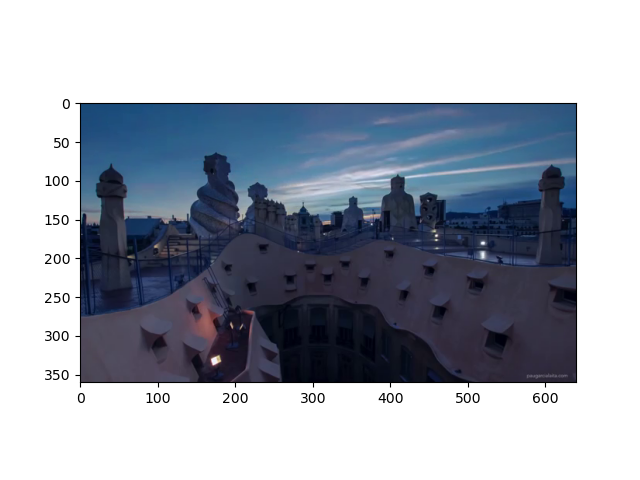

In [5]:
# Example
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=50, repeat= False)
plt.show()

a) Each of the scenes in a video is usually called 'shot'. Find where a shot (scene) finishes and the following starts (the shot boundaries). 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

In [7]:
"""
NOTE: the solution will be on top of the Funcanimation implementation for the plot. This one is a solution using a for loop 
to test it, but the implementation for the real solution will later below, since we no longer need the for loop
"""
from skimage import img_as_float
from skimage.exposure import histogram
from skimage.util import compare_images
"""
Algorithm:

Obtain the difference between consecutive frames (e.g. by histograms differences)

Decide where there is a jump in the frames appearance.

Cut video segments.

Obtain the foreground image (e.g. using the median filter).

Extract the foreground objects of the detected video segments.
"""
def rgb_Histogram(image):
    """
    create a histogram for each rgb channel of an image
    """
    
    hst_list = [] #list to save histograms
    image = img_as_float(image) #we change it to float type, so we can create the histogram
    
    #since we can´t create histograms out of colored images, we have to change it to grayscale; however, we
    #lose a lot of information if we do so; therefore, it´s better to create a histogram for each rgb component and 
    #concatenate them al. 
    #so we get the histograms for the rgb values 0,1,2
    hst_list.append(histogram(image[:, :, 0], 8)[0])#histogram of Nbins = 8
    hst_list.append(histogram(image[:, :, 1], 8)[0])
    hst_list.append(histogram(image[:, :, 2], 8)[0])
    return hst_list

def temporal_plot(ic):
    mean = [] #a list containing the mean difference of each image's histogram
    for i in range(len(ic) - 1): #len(ic) -1 because we compare i and i+1
        diff = [] #the list of differences between two images(frames), which resets when we explore the next image
        image_hst = rgb_Histogram(ic[i])
        nextimg_hst = rgb_Histogram(ic[i+1])
        
        #The method = 'diff' computes the absolute difference between the two
        diff.append(compare_images(image_hst[0], nextimg_hst[0], method='diff'))#diffR
        diff.append(compare_images(image_hst[1], nextimg_hst[1], method='diff'))#diffG
        diff.append(compare_images(image_hst[2], nextimg_hst[2], method='diff'))#diffB
        
        mean.append(np.mean(diff))#the mean difference of each image will help us define the different shots
    return mean
temporal_plot(ic)

"""
we use these functions as a test, but the implementation is different when we print it using FuncAnimation
"""

'\nwe use these functions as a test, but the implementation is different when we print it using FuncAnimation\n'

Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

<IPython.core.display.Javascript object>


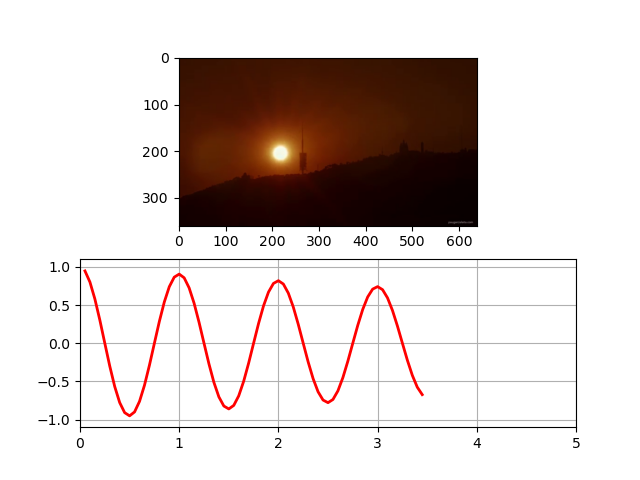

In [8]:
# Example A
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []

def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

In [9]:
# Your solution here
from skimage import img_as_float
from skimage.exposure import histogram
from skimage.util import compare_images
def rgb_Histogram(image):
    """
    create a histogram for each rgb channel of an image
    """
    hst_list = [] #list to save histograms
    image = img_as_float(image) #we change it to float type, so we can create the histogram
    
    #since we can´t create histograms out of colored images, we have to change it to grayscale; however, we
    #lose a lot of information if we do so; therefore, it´s better to create a histogram for each rgb component and 
    #concatenate them al. 
    #so we get the histograms for the rgb values 0,1,2
    hst_list.append(histogram(image[:, :, 0], 8)[0])#histogram of Nbins = 8
    hst_list.append(histogram(image[:, :, 1], 8)[0])
    hst_list.append(histogram(image[:, :, 2], 8)[0])
    return hst_list

#temporal plot so it can work with the run()
def temporal_plot1(ic, data):#where data is the index
    """
    we calculate the difference between each rbg histogram of 2 images, and we take the mean difference
    We take the mean difference because we safe the difference of each rgb histogram.
    """
    
    diff = [] #the list of differences between two images(frames), which resets when we explore the next image
    image_hst = rgb_Histogram(ic[data])
    nextimg_hst = rgb_Histogram(ic[data+1])
        
    #The method = 'diff' computes the absolute difference between the two
    diff.append(compare_images(image_hst[0], nextimg_hst[0], method='diff'))#diffR
    diff.append(compare_images(image_hst[1], nextimg_hst[1], method='diff'))#diffG
    diff.append(compare_images(image_hst[2], nextimg_hst[2], method='diff'))#diffB

    return np.mean(diff)#the mean difference of each image will help us define the different shot

In case you used histograms to separate shots, use different bins to see what is the optimal size of the histogram to better separate the shots.

<IPython.core.display.Javascript object>


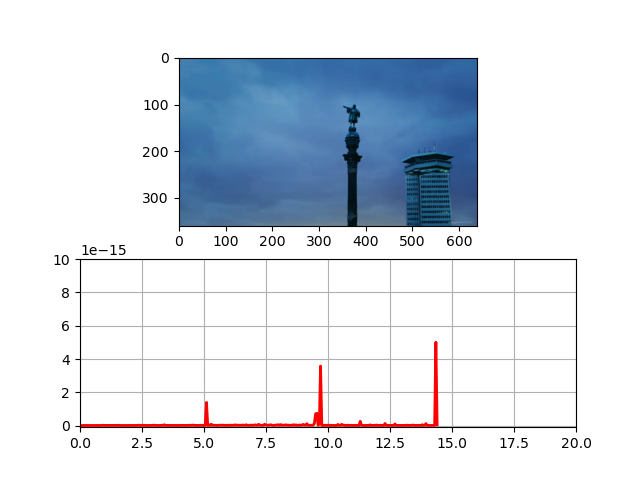

In [11]:
# Your solution here
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        
        cnt+=1
        t += 0.05
        y = temporal_plot1(ic, cnt)#we call the function that returns the difference in value
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-0.0000000000000001, 0.00000000000001)#we change the limits so they fit the values of the change in difference
#when you calll the function temporal plot, the result it gives you is very small, so in order to see the changes we need 
#to use a smaller scale
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
all_frames = [] #list to save thresholds

def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()    
        
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

In [ ]:
"""
Note: the following slide takes a couple of minutes to compile
"""

<IPython.core.display.Javascript object>


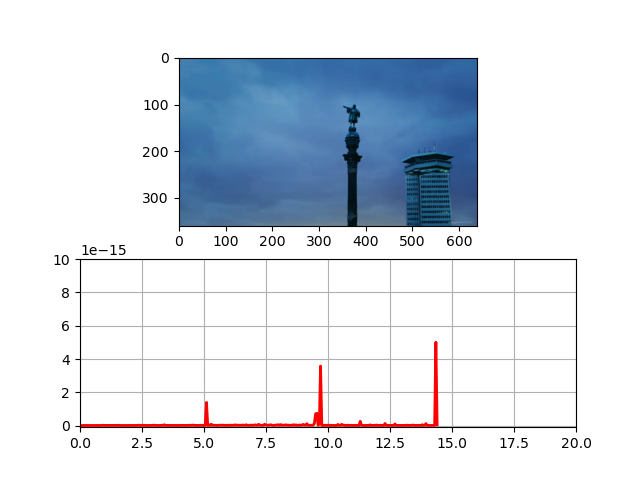

In [10]:
# Your solution here
"""This solution saves the differences and their index conrresponding to the image of the imageCollection, so we can use it
later for exercise b"""
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        
        cnt+=1
        t += 0.05
        y = temporal_plot1(ic, cnt)#we call the function that returns the difference in value
        all_frames.append((y,cnt)) #we add it to the list of thresholds
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-0.0000000000000001, 0.00000000000001)#we change the limits so they fit the values of the change in difference
#when you calll the function temporal plot, the result it gives you is very small, so in order to see the changes we need 
#to use a smaller scale
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
all_frames = [] #list to save thresholds

def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis
    
    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()    
        
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


**Hint:**
Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize the initial and final frames.


<IPython.core.display.Javascript object>


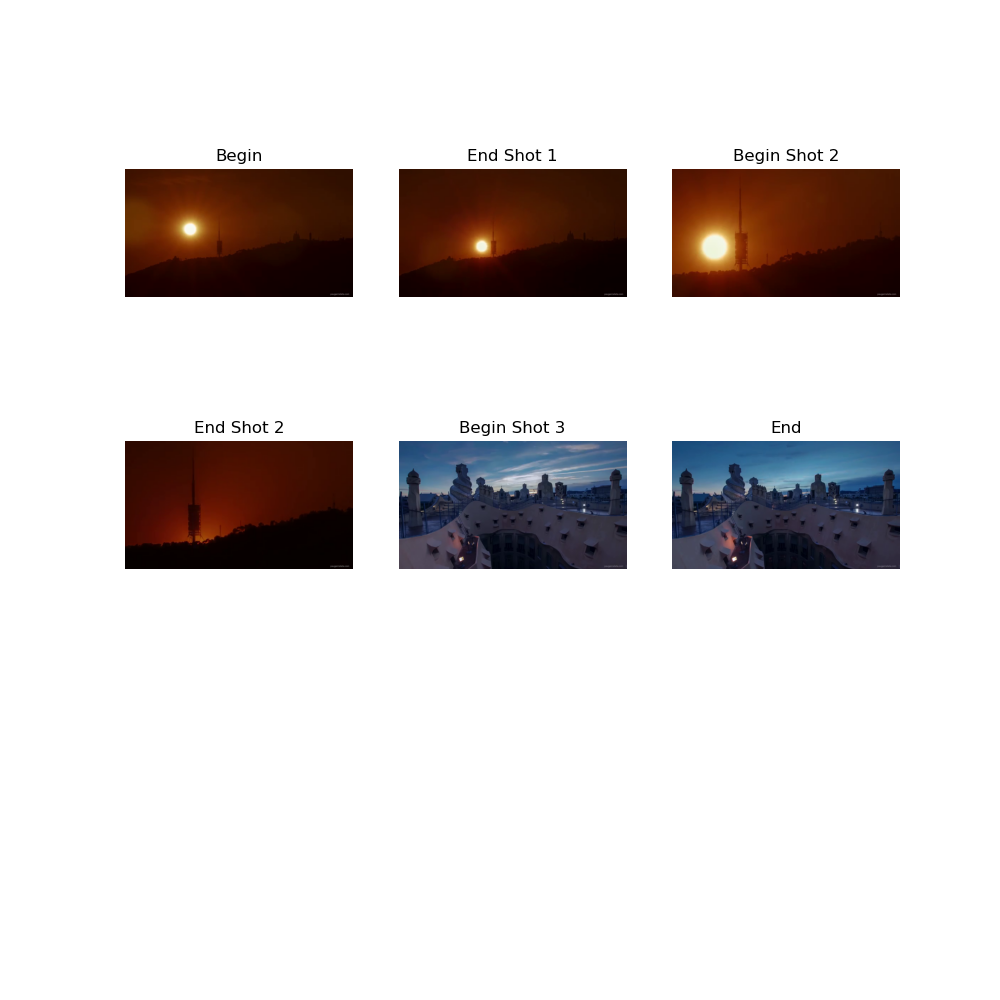

(-0.5, 639.5, 359.5, -0.5)

In [36]:
# Your solution here
%matplotlib nbagg

init_final_frames = []# we create the list where we save the beginig and end shots
init_final_frames.append(ic[0])#the biginning shot will be, of course, the first element
threshold = 1.3E-15 #looking at the graph we can aproximately see the peak points of change, and their value
#we will use this value as a threshold for determining new shots

for i in range(len(all_frames)):#going over the list (value, id) we saved from the last ploting function
    if all_frames[i][0] > threshold: #if the value of change at i is bigger than the threshold
        #print(all_frames[i][0])
        init_final_frames.append(ic[i-1])#we add the image that was just before
        init_final_frames.append(ic[i+1])#and just after the change

init_final_frames.append(ic[-1]) #the last image we add is the last image
        
#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Begin')
plt.imshow(init_final_frames[0], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('End Shot 1')
plt.imshow(init_final_frames[1], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Begin Shot 2')
plt.imshow(init_final_frames[2], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('End Shot 2')
plt.imshow(init_final_frames[3], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('Begin Shot 3')
plt.imshow(init_final_frames[4], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('End')
plt.imshow(init_final_frames[5], cmap='gray')
plt.axis('off')


c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [17]:
# Your solution here
"""
By getting the histogram of each rbg component of an image, we can later compare each rbg histogram of two frames, getting the 
absolute difference between the R,G, and B values of two images. After we get the rbg differences of two frames, we can then 
get the mean difference, which will show us how much of a change happens between two images. The bigger the change, the bigger 
the value of the mean difference.

Now all we have to do is choose a threshold value, which can be a little under the smallest of all the biggest changes. After 
we choose the value, any value over that can be considered a change in shot.
"""

d) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [18]:
# Your solution here
"""
it wouldn't be able to track objects, since continuous movement would create minimal diference.  When it comes to separating 
objects, since our code works on a general scale, we are not keeping track of the change of each pixel. It should be able to 
determine whether a new object appered on the same image since a new object would create a noticable difference, like we 
see in a shot change; however, this doesn't help up separate the object, we dont keep track of that.
"""

e) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [19]:
# Your solution here
"""
No, the algorithm we use looks at the difference between images; therefore, a continuous transition would go smoothly, 
changing a little over time, which would go unnoticed by the algorithm, all mean values of differences renturned by the code
would be similar.
"""

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

a) Visualize the following images for each different scene (there are 3) of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [51]:
"""
we use a slight changed version of the previous code, one that also adds the index of the image, so we can use it 
in the next cell
"""
init_final_frames = []# we create the list where we save the beginig and end shots
init_final_frames.append((ic[0],0))#the biginning shot will be, of course, the first element
threshold = 1.3E-15 #looking at the graph we can aproximately see the peak points of change, and their value
#we will use this value as a threshold for determining new shots

for i in range(len(all_frames)):#going over the list (value, id) we saved from the last ploting function
    if all_frames[i][0] > threshold: #if the value of change at i is bigger than the threshold
        #print(all_frames[i][0])
        init_final_frames.append((ic[i-1], i-1))#we add the image that was just before, and the index
        init_final_frames.append((ic[i+1], i+1))#and just after the change

init_final_frames.append((ic[-1], len(ic))) #the last image we add is the last image

<IPython.core.display.Javascript object>


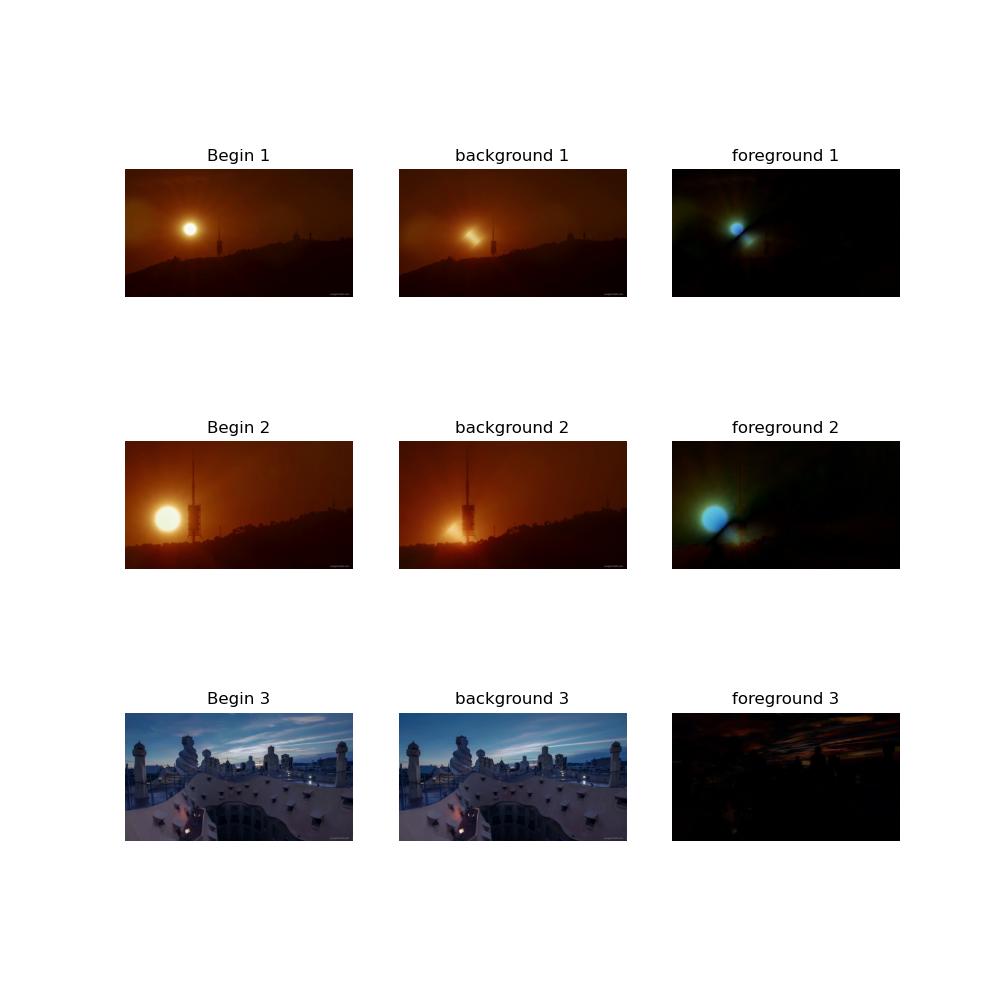

(-0.5, 639.5, 359.5, -0.5)

In [90]:
# Your solution here
#we use median filter to get the background

def get_background_foreground(shot):
    
    #We declare the containers containers of the images we later return
    background = np.zeros(shot[0].shape)
    foreground = np.zeros(shot[0].shape)
    
    #we create a list for each RGB pixel, so we can take the median later
    #we also create a list of image values so we can later substract the background and the foreground
    R, G, B, values = [], [], [], []
    
    #We go through all the images of the current shot, and we save the values if each channel
    for image in shot:
        image = img_as_float(image)
        values.append(image) #we also save the values of the image in general to use it for the foreground
        
        R.append(image[:, :, 0])
        G.append(image[:, :, 1])
        B.append(image[:, :, 2])
    
    #Now we get the background image using the median of each channel in the shot. 
    background[:, :, 0] = np.median(R, axis=0)
    background[:, :, 1] = np.median(G, axis=0)
    background[:, :, 2] = np.median(B, axis=0)
    
    #Now we just substract the values of each image in the shot with the background in order to get the foreground
    foreground = np.abs(values[0] - background)
    
    return background, foreground
    
"""
main code starts here
"""
#lists containing the calculating backgrounds and foregrounds
background_images = []
foreground_images = []

#we go through the list of init_final_frames, so we can use the Image collection and the indexes of the beginning and 
#ending of a shot, to get the background and foreground
#we skip two because we are sending the indexes of i and i+1 to get the background and foreground, we dont need duplicates
for i in range(0, len(init_final_frames)-1, 2): #start, stop, step
    
    #we get the indexes, start and end of a shot
    begin = init_final_frames[i][1]
    end = init_final_frames[i+1][1]
    
    #we only take the images of the shot by taking a chunk of IC, using the begin and end indexes of a shot
    shot = ic[begin : end + 1]
    background, foreground = get_background_foreground(shot)
    background_images.append(background)
    foreground_images.append(foreground)


#visualize
fig = plt.figure(figsize=(10,10))

fig.add_subplot(3,3,1)
plt.title('Begin 1')
plt.imshow(init_final_frames[0][0], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('background 1')
plt.imshow(background_images[0], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('foreground 1')
plt.imshow(foreground_images[0], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,4)
plt.title('Begin 2')
plt.imshow(init_final_frames[2][0], cmap='gray') #NOTE: we print init_final_frames by 2 because of how we get the background
plt.axis('off')

fig.add_subplot(3,3,5)
plt.title('background 2')
plt.imshow(background_images[1], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,6)
plt.title('foreground 2')
plt.imshow(foreground_images[1], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,7)
plt.title('Begin 3')
plt.imshow(init_final_frames[4][0], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,8)
plt.title('background 3')
plt.imshow(background_images[2], cmap='gray')
plt.axis('off')

fig.add_subplot(3,3,9)
plt.title('foreground 3')
plt.imshow(foreground_images[2], cmap='gray')
plt.axis('off')



In [ ]:
"""
NOTE: we only print the results for the same shots the asked in a the previous question 
"""

b) What do the static background images represent? 

In [21]:
# Your solution here
"""
It represents all of the pixels that do not change despite the changes during the shot.
Basically somethig that stays the same during a scene, a background.
"""

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [22]:
# Your solution here
"""
Since the median filter depends on which shot we are, the indexes will affect this result. Extracting the images wrong will mean
different indexes; therefore, the median filter we get out of each RGB for calcualating the background will be different/wrong.

If we find too many shots, its probably because we are using the wrong threshhold (too small). Apart from having more shots
to analyse, this would also mean less images to get rgb values from during background extraction, which will cause a different 
meadian value, hence a likely different background and foreground.
"""

d) What happens if you subtract the background image from the original one?

In [23]:
# Your solution here
"""
We would get the foreground. The elements that are changing that are not a part of the background.
"""

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [24]:
# Your solution here
"""
Of course, if we have smooth trasitions because of what we discussed before. Also if objects are moving too slow it would 
also have problems detecting spikes, hence different shots, if any, and it might result in an algorithm that thinks the whole
video is a shot; therefore, mixing the backgrounds and foregrounds of all the video.
"""

f) **[OPTIONAL]**
- Apply the algorithm to some other video that you found.

In [25]:
# Your solution here